## Group Step 2: Asking Questions (About Tyler Rogers Data)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import shapely
import json
import plotly
import seaborn as sns

pd.set_option('display.max_columns', None)
rogersT_df = pd.read_csv('../data/Clean_Data_Files/RogersTyler.csv')
rogersT_df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,SL,2021-10-01,72.7,-4.21,1.28,"Rogers, Tyler",630105,643511,strikeout,called_strike,NaN,NaN,NaN,NaN,2,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,2.0,NaN,0,2,2021,1.07,1.26,-0.20,3.19,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,6.119157,-105.251949,9.068690,6.813659,19.198474,-24.811825,3.12,1.44,NaN,NaN,NaN,71.5,2228.0,5.8,632267,54.66,NaN,NaN,0.00,1.0,0.0,0.0,NaN,63,3,Slider,3,0,0,3,0,3,0,3,Standard,Standard,109.0,0.021,-0.186
1,1,FF,2021-10-01,84.7,-4.04,1.20,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,11,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,1,2021,-0.02,-1.03,-1.01,2.64,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,7.015955,-122.420735,11.715600,-1.650002,24.845934,-45.230985,3.29,1.49,NaN,NaN,NaN,83.5,1843.0,6.0,632267,54.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,2,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Standard,326.0,0.000,-0.086
2,2,SL,2021-10-01,71.8,-4.14,1.30,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,13,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,0,2021,1.01,1.42,-1.27,1.65,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,3.938738,-104.206747,5.841171,6.570903,19.417985,-23.255556,3.29,1.48,NaN,NaN,NaN,71.0,2084.0,6.0,632267,54.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,1,Slider,3,0,0,3,0,3,0,3,Standard,Standard,128.0,0.000,-0.045
3,3,FF,2021-10-01,85.1,-3.97,1.27,"Rogers, Tyler",665487,643511,double,hit_into_play,NaN,NaN,NaN,NaN,12,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,X,9.0,ground_ball,1,2,2021,-0.10,-1.16,0.96,2.73,NaN,NaN,NaN,2,8,Top,200.98,126.49,NaN,NaN,457763,NaN,NaN,11.598584,-122.767530,12.011913,-3.120945,22.546270,-46.679874,3.49,1.60,58.0,85.5,1.0,84.2,1919.0,6.0,632267,54.47,0.257,0.231,1.25,1.0,1.0,1.0,2.0,62,4,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,325.0,-0.015,0.248
4,4,FF,2021-10-01,85.4,-4.06,1.23,"Rogers, Tyler",665487,643511,NaN,ball,NaN,NaN,NaN,NaN,12,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,B,NaN,NaN,0,2,2021,-0.21,-1.01,2.29,3.11,NaN,NaN,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,15.111890,-122.752750,12.705697,-4.903022,22.213076,-45.406024,3.70,1.72,NaN,NaN,NaN,84.3,1959.0,6.0,632267,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,3,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,324.0,0.000,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1124,FF,2021-04-01,83.8,-4.13,1.27,"Rogers, Tyler",592530,643511,fielders_choice,hit_into_play,NaN,NaN,NaN,NaN,6,"Jose Marmolejos reaches on a fielder's choice,...",R,L,R,SEA,SF,X,3.0,ground_ball,0,1,2021,-0.19,-1.29,0.42,2.19,666211.0,664238.0,641584.0,1,8,Bot,144.69,176.65,NaN,NaN,457763,NaN,NaN,10.717629,-120.847333,11.102800,-4.079584,25.323569,-47.531838,3.

In [3]:
rogersT_df.describe()

,Unnamed: 0,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.0,0.0,0.0,0.0,0.0,1129.000000,303.000000,1129.000000,1129.000000,1129.0,1129.000000,1129.000000,1129.000000,1129.000000,134.000000,222.000000,394.000000,1129.000000,1129.000000,253.00000,253.000000,0.0,0.0,1129.000000,0.0,0.0,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,452.000000,449.000000,449.000000,1129.000000,1096.000000,1096.000000,1129.000000,1129.000000,250.000000,250.000000,327.000000,327.000000,327.000000,327.000000,250.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1096.000000,1129.000000,1129.000000
mean,564.000000,78.003632,-3.988016,1.198804,597581.806909,643511.0,NaN,NaN,NaN,NaN,8.438441,4.963696,0.697077,0.837910,2021.0,0.389097,-0.124172,-0.080788,2.412214,596824.014925,607233.288288,592592.225888,0.972542,8.261293,126.98249,134.521937,NaN,NaN,516425.052259,NaN,NaN,7.630592,-112.812269,9.855879,1.193183,20.930292,-36.697175,3.430018,1.590487,116.922566,78.616704,7.538976,74.593623,2023.811131,5.899909,633374.148804,54.587130,0.282992,0.283032,0.279052,0.993884,0.211009,0.079511,2.764000,65.801594,2.661647,3.325066,3.347210,2.387954,4.284322,3.356953,3.338353,2.410983,4.284322,233.412409,-0.000981,-0.014046
std,326.058533,5.491560,0.116198,0.082449,61194.564819,0.0,NaN,NaN,NaN,NaN,4.008852,2.628550,0.893436,0.813961,0.0,0.645119,1.131327,0.896612,0.808017,68550.292877,55428.801914,62037.265993,0.823066,0.677604,36.67628,38.157060,NaN,NaN,70848.803240,NaN,NaN,2.101764,7.840203,2.063046,5.181732,2.769398,9.804108,0.160402,0.092123,113.154862,17.813422,35.089922,14.027255,232.712294,0.135114,764.367090,0.152114,0.258669,0.268676,0.463231,0.078086,0.408650,0.406740,1.099609,7.300391,1.647249,1.964151,2.255783,1.837377,1.941916,2.254457,1.971146,1.854959,1.941916,108.700559,0.056043,0.248926
min,0.000000,68.400000,-4.350000,0.940000,405395.000000,643511.0,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,2021.0,-1.050000,-1.590000,-3.030000,-0.850000,453568.000000,453568.000000,453568.000000,0.000000,6.000000,14.96000,39.740000,NaN,NaN,457763.000000,NaN,NaN,1.500981,-122.933498,1.722808,-12.116710,14.490709,-50.174521,2.820000,1.310000,0.000000,14.400000,-83.000000,0.000000,1125.000000,5.000000,632169.000000,54.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,-0.667000,-0.953000
25%,282.000000,72.000000,-4.070000,1.140000,570481.000000,643511.0,NaN,NaN,NaN,NaN,5.000000,2.000000,0.000000,0.000000,2021.0,-0.150000,-1.150000,-0.660000,1.850000,570481.000000,572233.000000,571970.000000,0.000000,8.000000,105.36000,106.010000,NaN,NaN,457763.000000,NaN,NaN,6.145729,-119.710802,8.632974,-3.177828,18.646879,-45.659921,3.320000,1.530000,8.000000,66.800000,-15.000000,70.900000,1838.000000,5.800000,632661.000000,54.510000,0.091000,0.087500,0.000000,1.000000,0.000000,0.000000,2.000000,61.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,115.000000,0.000000,-0.086000
50%,564.000000,81.500000,-3.980000,1.200000,60646

## Table of Contents:

**Block 1** - What is the average release point for when Tyler Rogers allows a home run? How does it compare to other event outcomes?

**Block 2** - In a two strike count, what is the most used pitch by Tyler Rogers?

**Block 3** - What release point results in the slowest launch speed? What pitch type results in the slowest launch speed?

**Block 4** - Does the release point of Tyler Rogers change when a runner is on base? Does the pitch speed?

**Block 5** - Does the pitch speed of Tyler Rogers correlate with the vertical release point of the ball?

**Block 6** - How long does a Tyler Rogers at-bat normally last (in terms of number of pitches thrown to the batter)?

**Block 7** - What inning does Tyler Rogers pitch in the most?

# Block 1

### Question: What is the average release point for when Tyler Rogers allows a home run? How does it compare to other event outcomes?

### Steps:

* Group the dataframe by "events"
* Find the average "release_pos_z" for each of these event types
* Sort the outcomes by highest to lowest release point
* Select the "home run" event
* Look at the "home run" event and its related data

In [2]:
#Group the dataframe by "events"
#Get the average "release_pos_z" for each of these event types
rogers_groupby_events = rogersT_df.groupby("events")["release_pos_z"].mean()

#Sort the outcomes by highest to lowest release point
print("Release point for each event type:")
rogers_groupby_events.sort_values(ascending = False)

Release point for each event type:


events
fielders_choice              1.270000
sac_fly                      1.265000
fielders_choice_out          1.250000
sac_bunt                     1.230000
caught_stealing_2b           1.210000
double                       1.210000
grounded_into_double_play    1.203333
field_out                    1.203311
home_run                     1.186000
strikeout                    1.184909
single                       1.180862
walk                         1.178462
force_out                    1.178182
hit_by_pitch                 1.106000
field_error                  1.096667
Name: release_pos_z, dtype: float64

In [3]:
#Select the "home run" event
home_run_val = rogers_groupby_events.sort_values(ascending = False)["home_run"]
home_run_val

1.186

In [4]:
#Look at the "home run" event and its related data
rogersT_df.groupby("events")["release_pos_z"].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
caught_stealing_2b,1.0,1.210000,NaN,1.21,1.2100,1.210,1.2100,1.21
double,11.0,1.210000,0.074699,1.13,1.1500,1.160,1.2750,1.32
field_error,3.0,1.096667,0.015275,1.08,1.0900,1.100,1.1050,1.11
field_out,151.0,1.203311,0.081835,1.00,1.1400,1.200,1.2600,1.39
fielders_choice,1.0,1.270000,NaN,1.27,1.2700,1.270,1.2700,1.27
fielders_choice_out,1.0,1.250000,NaN,1.25,1.2500,1.250,1.2500,1.25
force_out,11.0,1.178182,0.062740,1.06,1.1500,1.170,1.2300,1.26
grounded_into_double_play,9.0,1.203333,0.079844,1.02,1.1800,1.220,1.2600,1.29
hit_by_pitch,5.0,1.106000,0.135019,0.94,1.0700,1.070,1.1400,1.31


### ANSWER: 

When Tyler Rogers allows a home run, the release point on the pitch is at 1.186 feet on average. 

### INTERPRETATION/OBSERVATION

The release point average for a home run (1.186 feet) seems to be about in the middle of the pack in terms of other outcomes. Of the five home runs Tyler Rogers allowed, the minimum release point was 1.09 and the maximum was 1.33. 


The general spread of average release points for each event seems to vary by only a few fractions of a foot.

# Block 2

### Question: In a two strike count, what is the most used pitch by Tyler Rogers?

### Steps:

* Create a row filter for every instance with two strikes
* Create a dataframe for every instance with two strikes
* Group the two strike dataframe by pitch type & count how many times each pitch type occurs

In [5]:
# Create a row filter for every instance with two strikes
two_strike_filt = rogersT_df["strikes"] == 2

# Create a dataframe for every instance with two strikes
two_strikes = rogersT_df[two_strike_filt]
two_strikes

# Group the two strike dataframe by pitch type & count how many times each pitch type occurs
two_strikes["pitch_type"].value_counts()

SL    173
FF     87
SI     37
Name: pitch_type, dtype: int64

### ANSWER: 

In a two strike count, Tyler Rogers most frequently uses a slider (173 instances), followed up by hist fastball (87) and sinker (37)

### INTERPRETATION/OBSERVATION

This outcome leads us to believe that in the key situation of two strikes, Tyler Rogers is most likely going to throw a slider. His slider could be seen as his "punch-out" pitch.

# Block 3

### Question: What release point results in the slowest launch speed? What pitch type results in the slowest launch speed?

### Steps:

* Group the Dataframe by Release Position Z with the average Launch Speed for each release position
* Sort these values from slowest to fastest
* Print the five slowest release points
* Repeat above but with "pitch_type" instead of Release Position Z

In [6]:
#Group the Dataframe by Release Position Z with the average Launch Speed for each release position
rogersT_df_launchspeed = rogersT_df.groupby("release_pos_z")["launch_speed"].mean()

# Sort these values from slowest to fastest
rogersT_df_launchspeed_sorted = rogersT_df_launchspeed.sort_values()

# Print the five slowest release points
rogersT_df_launchspeed_sorted.head()

release_pos_z
1.35    61.250000
1.21    68.650000
1.31    69.433333
1.05    70.650000
1.26    73.280000
Name: launch_speed, dtype: float64

In [7]:
#Repeat above but with "pitch_type" instead of Release Position Z
rogersT_df.groupby("pitch_type")["launch_speed"].mean().sort_values()

pitch_type
SL    75.036196
FF    80.466792
SI    83.061905
Name: launch_speed, dtype: float64

### ANSWER: 

The slowest batted ball exit velocity comes from a release point of 1.35 feet (followed by 1.21 feet, 1.31 feet), with an average exit velocity of 61.25 mph

The slowest batted ball comes from his Slider (followed by Fastball, Sinker), with an average exit velocity of 75.03 mph

### INTERPRETATION/OBSERVATION

When Tyler Rogers releases the pitch 1.35 feet above the ground, the batter will hit the ball with an average exit velocity of 61.2 miles per hour, which is the lowest of any other relase point by 7 miles per hour

One metric to measure the effectiveness of a pitch is its resulting exit velocity. Tyler Rogers' slider results in an average exit velocity of 75 miles per hour, the slowest of all his pitches.

# Block 4

### Question: Does the release point of Tyler Rogers change when a runner is on base? Does the pitch speed?

### Steps:

* Create a "Empty base" dataframe
* Create a "Runner on Base" dataframe
* Compare the average release position z & average pitch velocity within each database

In [8]:
#Create a "Empty base" dataframe
non_third = rogersT_df["on_3b"].isnull()
non_second = rogersT_df["on_2b"].isnull()
non_first = rogersT_df["on_1b"].isnull()

rogersT_emptybase_df = rogersT_df[non_third & non_second & non_first]
rogersT_emptybase_df.head(2)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3,3,FF,2021-10-01,85.1,-3.97,1.27,"Rogers, Tyler",665487,643511,double,hit_into_play,NaN,NaN,NaN,NaN,12,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,X,9.0,ground_ball,1,2,2021,-0.10,-1.16,0.96,2.73,NaN,NaN,NaN,2,8,Top,200.98,126.49,NaN,NaN,457763,NaN,NaN,11.598584,-122.76753,12.011913,-3.120945,22.546270,-46.679874,3.49,1.60,58.0,85.5,1.0,84.2,1919.0,6.0,632267,54.47,0.257,0.231,1.25,1.0,1.0,1.0,2.0,62,4,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,325.0,-0.015,0.248
4,4,FF,2021-10-01,85.4,-4.06,1.23,"Rogers, Tyler",665487,643511,NaN,ball,NaN,NaN,NaN,NaN,12,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,B,NaN,NaN,0,2,2021,-0.21,-1.01,2.29,3.11,NaN,NaN,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,15.111890,-122.75275,12.705697,-4.903022,22.213076,-45.406024,3.70,1.72,NaN,NaN,NaN,84.3,1959.0,6.0,632267,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,3,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,324.0,0.000,0.011


In [9]:
#Create a "Runner on Base" dataframe
on_third = rogersT_df["on_3b"] > 0
on_second = rogersT_df["on_2b"] > 0
on_first = rogersT_df["on_1b"] > 0

rogersT_onbase_df = rogersT_df[on_third | on_second | on_first]
rogersT_onbase_df.head(2)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,SL,2021-10-01,72.7,-4.21,1.28,"Rogers, Tyler",630105,643511,strikeout,called_strike,NaN,NaN,NaN,NaN,2,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,2.0,NaN,0,2,2021,1.07,1.26,-0.20,3.19,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,6.119157,-105.251949,9.06869,6.813659,19.198474,-24.811825,3.12,1.44,NaN,NaN,NaN,71.5,2228.0,5.8,632267,54.66,NaN,NaN,0.0,1.0,0.0,0.0,NaN,63,3,Slider,3,0,0,3,0,3,0,3,Standard,Standard,109.0,0.021,-0.186
1,1,FF,2021-10-01,84.7,-4.04,1.20,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,11,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,1,2021,-0.02,-1.03,-1.01,2.64,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,7.015955,-122.420735,11.71560,-1.650002,24.845934,-45.230985,3.29,1.49,NaN,NaN,NaN,83.5,1843.0,6.0,632267,54.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,2,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Standard,326.0,0.000,-0.086


In [10]:
#Compare the average release position z & average pitch velocity within each database
empty_release_pt = rogersT_emptybase_df["release_pos_z"].mean().round(3)
empty_velocity = rogersT_emptybase_df["release_speed"].mean().round(3)

runner_release_pt = rogersT_onbase_df["release_pos_z"].mean().round(3)
runner_velocity = rogersT_onbase_df["release_speed"].mean().round(3)

print("Release Position for Empty Bases: ", empty_release_pt)
print("Release Position for Runners on: ", runner_release_pt)
print("Abs diff:", np.absolute(empty_release_pt -runner_release_pt).round(3)  )
print("\n")
print("Velocity for Empty Bases: ", empty_velocity)
print("Velocity for Runners on: ", runner_velocity)
print("Abs diff:", np.absolute(empty_velocity -runner_velocity).round(3)  )

Release Position for Empty Bases:  1.202
Release Position for Runners on:  1.195
Abs diff: 0.007


Velocity for Empty Bases:  78.377
Velocity for Runners on:  77.592
Abs diff: 0.785


### ANSWER: 

The difference between release position when runners are on base is negligible (less than an inch)

The difference between pitch velocity when runners are on base is .785 mph

### INTERPRETATION/OBSERVATION

This data tells us Tyler Rogers is very consistent with his quirky submarine motion no matter the circumstance, but that he does throw slightly slower with runners on base. A question for further investigation would be to see if this drop in velocity being due to throwing more off-speed pitches (which are naturally slower) with runners on base or that his fastball velocity is genuinely slower with runners on base


# Block 5

### Question: Does the pitch speed of Tyler Rogers correlate with the vertical release point of the ball?

### Steps:

* Identify the necessary columns of comparision
* Run the correlation function
* Plot the two data columns to see if the correlation makes sense

In [11]:
#Identify the necessary columns of comparision
pitch_speed = rogersT_df["release_speed"]
vertical_release = rogersT_df["release_pos_z"]

#Run the correlation function
correlation = pitch_speed.corr(vertical_release)
correlation

-0.1558234264554065

<AxesSubplot:xlabel='release_pos_z', ylabel='release_speed'>

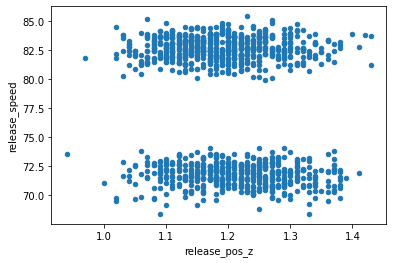

In [12]:
#Plot the two data columns to see if the correlation makes sense
rogersT_df.plot.scatter(y = "release_speed", x = "release_pos_z")

### ANSWER: 

There does not seem to be any correlation between Tyler Rogers' release point and the velocity.

### INTERPRETATION/OBSERVATION

This lack of correlation could be due to a confounding factor that he throws drastically difference pitches with drastically different velocities. This could be an area for further exploration, but it doesn't seem likely as I ran the same analysis by grouping by pitch type (slider) and there is still no noticeable correlation


-0.07365194481416512


<AxesSubplot:xlabel='release_pos_z', ylabel='release_speed'>

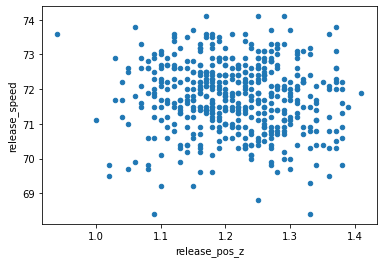

In [13]:
slider_filter = rogersT_df["pitch_type"] == "SL"
slider_df = rogersT_df[slider_filter]
slider_df

slider_pitch_speed = slider_df["release_speed"]
slider_vertical_release = slider_df["release_pos_z"]

slider_correlation = slider_pitch_speed.corr(slider_vertical_release)
print(slider_correlation)

slider_df.plot.scatter(y = "release_speed", x = "release_pos_z")

# Block 6

### Question: How long does a Tyler Rogers at-bat normally last (in terms of number of pitches thrown to the batter)?

### Steps:

* Group the data by each at-bat's outcome (this can be accomplished by grouping by "des")
* Also group by game_date so that identical "des" outputs can be differentiated. 
* Compute the average on this new data

In [14]:
#Group the data by each at-bat (this can be accomplished by grouping by "des")
# Also group by game_date so that identical "des" outputs can be 
size_df = rogersT_df.groupby(["des", "game_date"])["pitch_number"].size()
size_df

#size_df2.count()

des                                                                                                   game_date 
AJ Pollock grounds out softly, catcher Curt Casali to first baseman LaMonte Wade.                     2021-07-21    4
AJ Pollock lines out sharply to center fielder Austin Slater.                                         2021-09-03    4
Adam Duvall called out on strikes.                                                                    2021-04-25    4
Adam Duvall singles on a sharp ground ball to right fielder Mike Yastrzemski.   Austin Riley to 2nd.  2021-09-17    1
Adam Duvall strikes out swinging.                                                                     2021-04-17    3
                                                                                                                   ..
Yadier Molina lines out to center fielder Steven Duggar.                                              2021-07-16    2
Yan Gomes singles on a line drive to right fielder Kris Bryan

In [15]:
#Compute the average on this new data
size_df.mean()

3.452599388379205

### ANSWER: 

The average Tyler Rogers at-bat lasts 3.46 pitches

### INTERPRETATION/OBSERVATION

Tyler Rogers throws a lot of strikes and pitches to contact, resulting in shorter at-bats, so this result makes sense

# Block 7

### Question: What inning does Tyler Rogers pitch in the most?

### Steps:

* Find the distribution of innings via groupby function
* Plot the distribution

In [16]:
#Find the distribution of innings via groupby function
rogersT_inning_dist = rogersT_df.groupby('inning').size()
rogersT_inning_dist

inning
6      19
7      65
8     675
9     342
10     28
dtype: int64

<AxesSubplot:xlabel='inning'>

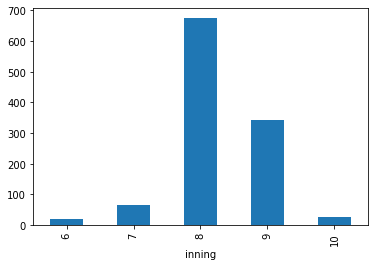

In [17]:
#Plot the distribution
rogersT_inning_dist.plot(kind='bar')

### ANSWER: 

Tyler Rogers mainly pitches in the 8th inning

### INTERPRETATION/OBSERVATION

This confirms our belief that Tyler Rogers is not a closer, but a 8th-inning set up pitcher. With this style of distribution, we can also look at other data, like his pitch speed during each inning (which is actually very consistent) 

In [18]:
rogersT_df.groupby('inning')['release_speed'].mean()

inning
6     78.557895
7     78.356923
8     77.501185
9     78.949123
10    77.371429
Name: release_speed, dtype: float64